#### The Sparks Foundation 
#### Name - Omkar Sanjay Jadhav
#### TASK 3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
#### Batch - OCT2021
 Dataset : https://bit.ly/3i4rbWl <br>
● As a business manager, try to find out the weak areas where you can work to make more profit.<br>
● What all business problems you can derive by exploring the data<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the DataSet 

df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
# Shape of total dataset

df.shape

(9994, 13)

In [4]:
# Here we are checking the null values in dataset

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Taking value counts of Ship Mode

df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [7]:
# There is no need of country & postal as they don't affect more 

df = df.drop(["Country","Postal Code"],axis=1)

In [8]:
df.shape

(9994, 11)

In [9]:
# Now we will see the duplicate values is df

df.duplicated().sum()

50

In [10]:
# drop this duplicate values

df.drop_duplicates(inplace=True)

In [11]:
df.shape

(9944, 11)

C:\Users\shile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


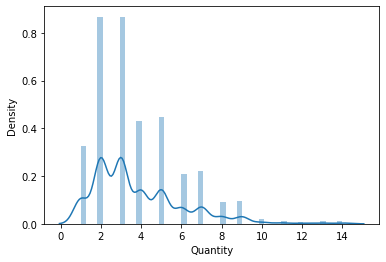

In [12]:
# Now we have cleaned the data now we will try to visualize the data

sns.distplot(df['Quantity'])
plt.show()

C:\Users\shile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


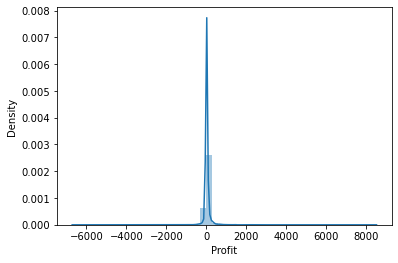

In [13]:
sns.distplot(df['Profit'])
plt.show()

C:\Users\shile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


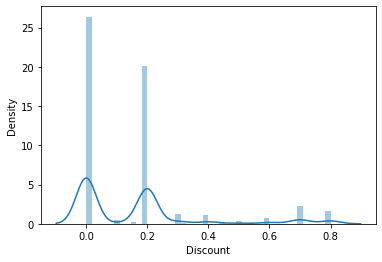

In [14]:
sns.distplot(df['Discount'])
plt.show()

In [15]:
# Co-relation between Sales,Quantity,Discount Profit

corr = df.corr()
corr


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


<AxesSubplot:>

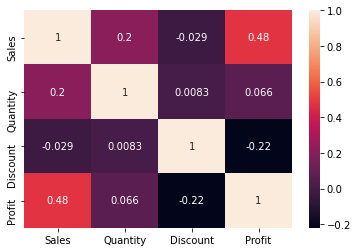

In [16]:
# Heatmap of corelation

sns.heatmap(corr, annot = True)


In [17]:
# We will see the sales based on states

sales_df = df.groupby('State')['Profit'].sum()
sales_df = sales_df.reset_index()
sales_df.head(10)


,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76215.9705
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


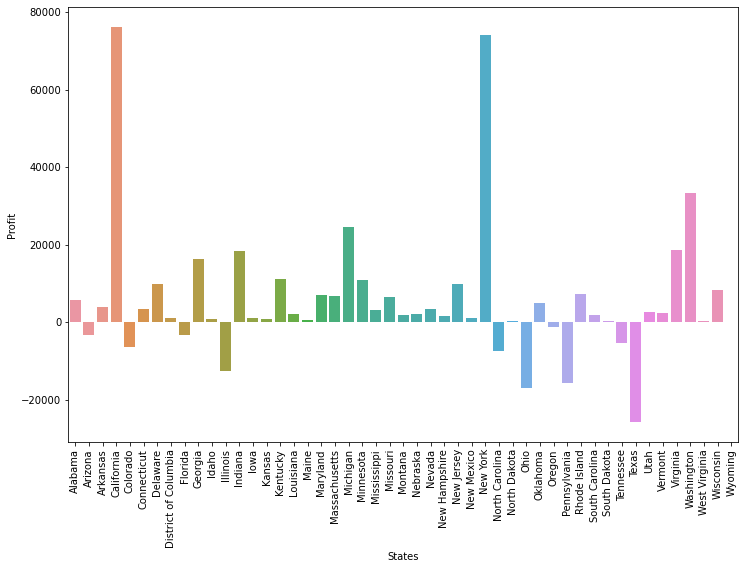

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x = sales_df['State'], y = sales_df['Profit'])
plt.xlabel('States')
plt.ylabel('Profit')
plt.xticks(rotation = 'vertical')
plt.yticks(rotation = 'horizontal')

plt.show()

#### From above bar chart we can say that state like California,Newyork,Washington,Georgia Have highest sales while Texas,pennsylyvnai have the lowest sales


In [19]:
# Category Vs Profit

category_df = df.groupby('Category')['Profit'].sum()
category_df = category_df.reset_index()
category_df.head()

,Category,Profit
0,Furniture,18484.9459
1,Office Supplies,122196.0726
2,Technology,145416.5394


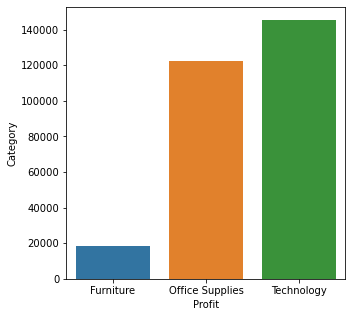

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x = category_df['Category'],y = category_df['Profit'])
plt.xlabel('Profit')
plt.ylabel('Category')
plt.show()

#### Here in above barchart we can say that profit for Office supplies & Techlogy is large while the Furniture is very low

C:\Users\shile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


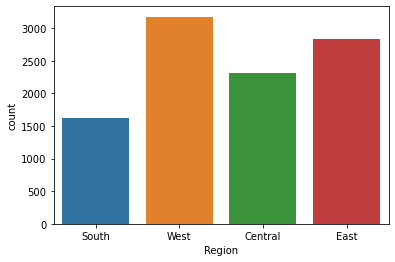

In [21]:
# Now we will see the profit based on region

sns.countplot("Region", data=df)
plt.show()

#### Here we see the highest contriubutor is west then east and then central while south is least countributor 

C:\Users\shile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


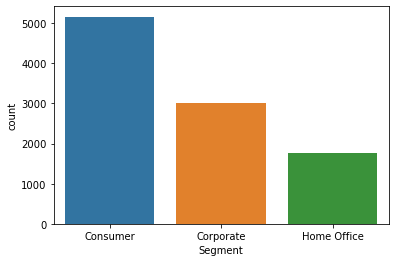

In [22]:
sns.countplot("Segment", data=df)
plt.show()

##### Home Office make least sale while consumer make large sales

[]

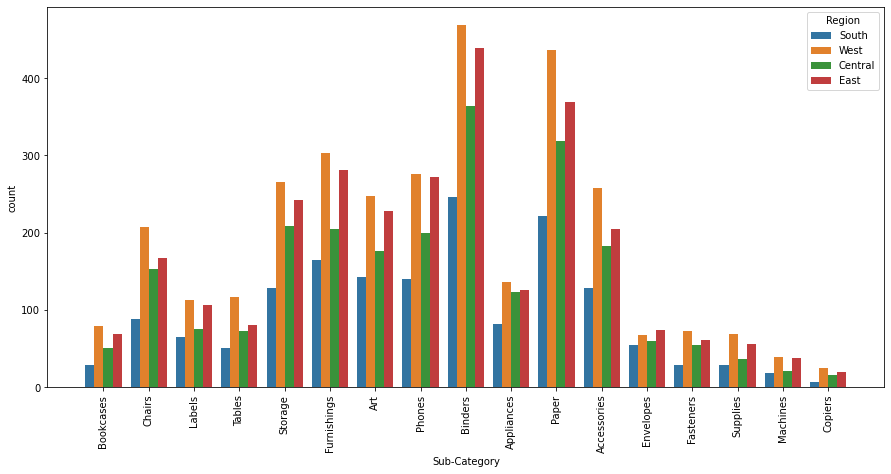

In [23]:
# Sub-category Vs Region

plt.figure(figsize=(15,7))
sns.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

##### Copiers, Machines and Supplies are the least sold products overall . South Accounts for the least sales in any of the sub-categories & West Accounts more in any sales

#### Sales per State

In [24]:
df_state = df.groupby("State")["Sales"].sum().sort_values(ascending = False)
df_state = df_state.to_frame().reset_index()
df_state.head()

,State,Sales
0,California,456629.9285
1,New York,310349.2150
2,Texas,170101.1278
3,Washington,138560.8100
4,Pennsylvania,116383.0100


Text(0, 0.5, 'Sales')

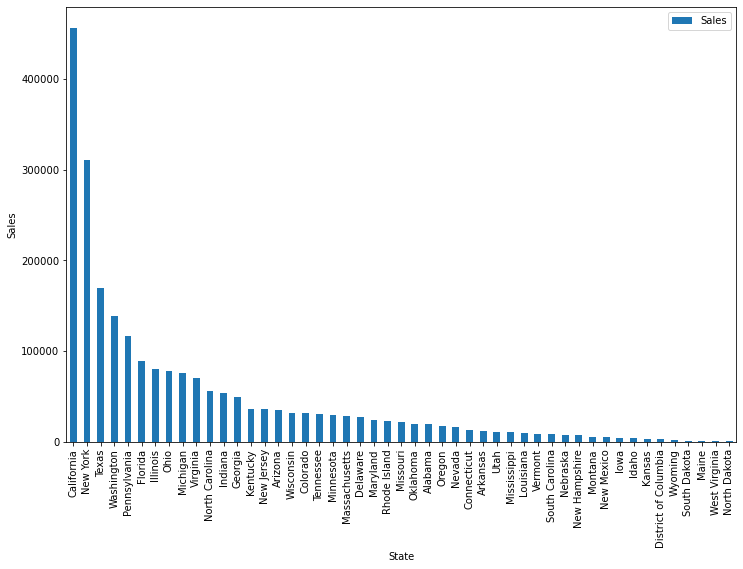

In [25]:
df_state.plot(kind = "bar" , x = "State" ,  y = "Sales" , figsize = (12,8))
plt.ylabel("Sales")

1.Highest sales- California, New York and Texas <br>
 2.Least sales- North Dakota, West Virginia, Maine and South Dakota

### Profit and sales for sub-categories

<ipython-input-26-2a28b781751c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub_df = df.groupby("Sub-Category")["Profit" , "Sales"].sum()


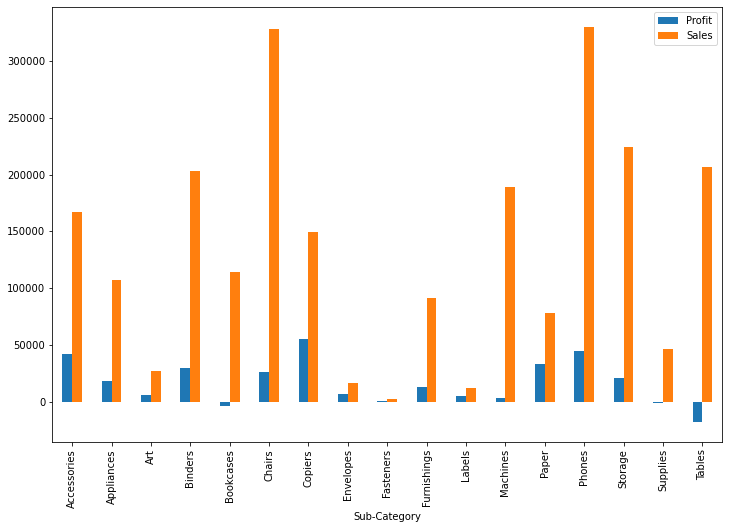

In [26]:
sub_df = df.groupby("Sub-Category")["Profit" , "Sales"].sum()
sub_df.plot(kind = "bar"  ,figsize = (12 , 8))
plt.show()

### Conclusion :
    

● We can conclude that our sales are higher as compared to our profit.

● Tables, Bookcases and Supplies are responsible for maximum losses( in negative)

Weak Areas :

● Though Copiers are the least sold products it makes most of the profit so, we must look for ways to improve the sales of the Copiers.

● Tables should either be removed from the market or major changes should be made to tables in order to not incur losses in future.

● We should try to improve our sales in North Dakota, South Dakota , West Virginia and Columbia using new techniques.

● Our sales at Illinois, Ohio, Texas and Pennsylvania are making losses so we must concentrate on the loss making issues in this region.

● So , in order to improve our sales and profit we must pay special attention to our losses and strengthen our weak areas as mentioned above.
